In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
!pip install pydub

In [ ]:
# imports
import pandas as pd
import numpy as np
import os
import shutil
import csv
# from pydub import AudioSegment
import librosa
from librosa.feature.rhythm import tempogram_ratio
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
import sklearn.metrics as metrics
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
import tensorflow as tf
from tensorflow import keras
from keras import models
from keras import layers
from sklearn.metrics import confusion_matrix

In [ ]:
original_set_path = '/content/drive/MyDrive/Colab Notebooks/data/GTZAN_30sec'
genres = os.listdir(original_set_path)
genres, len(genres)

(['jazz',
  'hiphop',
  'country',
  'rock',
  'reggae',
  'pop',
  'metal',
  'blues',
  'classical',
  'disco'],
 10)

In [ ]:
#make sure 30 is divisible by split
def split_songs(split):

  #Make folders
  new_set_path = f'/content/drive/MyDrive/Colab Notebooks/data/GTZAN_{split}sec'
  os.makedirs(new_set_path, exist_ok=True)
  for genre in genres:
    os.makedirs(os.path.join(new_set_path, f'{genre}'), exist_ok=True)

  #Split audio, export it
  n = 0
  for genre in genres:
    for filename in os.listdir(f'{original_set_path}/{genre}'):
      n += 1
      print("\r", n, "out of 1000 songs split", end="", flush=True)

      song_path = f'{original_set_path}/{genre}/{filename}'
      file_num = filename.split('.')[1]
      audio = AudioSegment.from_file(song_path, format='au')

      for i in range(int(30 / split)):
        start = split * i * 1000
        end = split * (i + 1) * 1000
        split_audio = audio[start:end]
        split_audio.export(f'{new_set_path}/{genre}/{genre}.{file_num}-{i + 1}', format='wav')

In [ ]:
split_songs(10) #3000 samples

 1000 out of 1000 songs split

In [ ]:
split_songs(5) #6000 samples

 1000 out of 1000 songs split

In [ ]:
split_songs(3) #10000 samples

 1000 out of 1000 songs split

In [ ]:
base_path = '/content/drive/MyDrive/Colab Notebooks/data'
folders = [["GTZAN_30sec", 30], ["GTZAN_10sec", 10], ["GTZAN_5sec", 5], ["GTZAN_3sec", 3]]
header = ["filename", "centroid_mean", "centroid_var", "rolloff_mean", "rolloff_var",
          "flux_mean", "flux_var", "zerocrossing_mean", "zerocrossing_var", "chroma_stft_mean",
          "chroma_stft_var", "rms_mean", "rms_var", "bandwidth_mean", "bandwidth_var",
          "tonnetz_mean", "tonnetz_var", "mfcc1", "mfcc2", "mfcc3",
          "mfcc4", "mfcc5", "tempo", "tempogram_ratio", "genre"]

In [ ]:
len(header)

25

Split 3 sec data

In [ ]:
with open(f'/content/drive/MyDrive/Colab Notebooks/data/{folders[3][0]}.csv', 'w', newline='') as f:
    writer = csv.writer(f)
    writer.writerow(header)
n = 0
for genre in genres:
  for filename in os.listdir(f'{base_path}/{folders[3][0]}/{genre}'):
    song_path = f'{base_path}/{folders[3][0]}/{genre}/{filename}'
    attributes = [filename]
    y, sr = librosa.load(song_path, mono=True, duration=folders[3][1])
    centroid = librosa.feature.spectral_centroid(y=y, sr=sr)
    attributes.extend([np.mean(centroid), np.var(centroid)])
    rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
    attributes.extend([np.mean(rolloff), np.var(rolloff)])
    attributes.extend([np.NaN, np.NaN]) #Can't find a library that computes flux
    zc = librosa.feature.zero_crossing_rate(y=y)
    attributes.extend([np.mean(zc), np.var(zc)])
    stft = librosa.feature.chroma_stft(y=y, sr=sr)
    attributes.extend([np.mean(stft), np.var(stft)])
    rms = librosa.feature.rms(y=y)
    attributes.extend([np.mean(rms), np.var(rms)])
    bandwidth = librosa.feature.spectral_bandwidth(y=y, sr=sr)
    attributes.extend([np.mean(bandwidth), np.var(bandwidth)])
    tonnetz = librosa.feature.tonnetz(y=y, sr=sr)
    attributes.extend([np.mean(tonnetz), np.var(tonnetz)])
    mfcc = librosa.feature.mfcc(y=y, sr=sr)
    attributes.extend([np.mean(mfcc[0]), np.mean(mfcc[1]), np.mean(mfcc[2]), np.mean(mfcc[3]), np.mean(mfcc[4])])
    tempo = librosa.feature.tempo(y=y, sr=sr)
    attributes.append(np.mean(tempo))
    tempogram_ratio = librosa.feature.tempogram_ratio(y=y, sr=sr)
    attributes.append(np.mean(tempogram_ratio))
    attributes.append(genre)
    with open(f'/content/drive/MyDrive/Colab Notebooks/data/{folders[3][0]}.csv', 'a', newline='') as f:
      writer = csv.writer(f)
      writer.writerow(attributes)
    n+=1
    print("\r",n,"songs out of 10000 processed", end='', flush=True)

 1340 songs out of 10000 processed

/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:256: UserWarning: n_fft=1024 is too large for input signal of length=1011
  warnings.warn(


 10000 songs out of 10000 processed

Split 5 sec data

In [ ]:
with open(f'/content/drive/MyDrive/Colab Notebooks/data/{folders[2][0]}.csv', 'w', newline='') as f:
    writer = csv.writer(f)
    writer.writerow(header)
n = 0
for genre in genres:
  for filename in os.listdir(f'{base_path}/{folders[2][0]}/{genre}'):
    song_path = f'{base_path}/{folders[2][0]}/{genre}/{filename}'
    attributes = [filename]
    y, sr = librosa.load(song_path, mono=True, duration=folders[2][1])
    centroid = librosa.feature.spectral_centroid(y=y, sr=sr)
    attributes.extend([np.mean(centroid), np.var(centroid)])
    rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
    attributes.extend([np.mean(rolloff), np.var(rolloff)])
    attributes.extend([np.NaN, np.NaN]) #Can't find a library that computes flux
    zc = librosa.feature.zero_crossing_rate(y=y)
    attributes.extend([np.mean(zc), np.var(zc)])
    stft = librosa.feature.chroma_stft(y=y, sr=sr)
    attributes.extend([np.mean(stft), np.var(stft)])
    rms = librosa.feature.rms(y=y)
    attributes.extend([np.mean(rms), np.var(rms)])
    bandwidth = librosa.feature.spectral_bandwidth(y=y, sr=sr)
    attributes.extend([np.mean(bandwidth), np.var(bandwidth)])
    tonnetz = librosa.feature.tonnetz(y=y, sr=sr)
    attributes.extend([np.mean(tonnetz), np.var(tonnetz)])
    mfcc = librosa.feature.mfcc(y=y, sr=sr)
    attributes.extend([np.mean(mfcc[0]), np.mean(mfcc[1]), np.mean(mfcc[2]), np.mean(mfcc[3]), np.mean(mfcc[4])])
    tempo = librosa.feature.tempo(y=y, sr=sr)
    attributes.append(np.mean(tempo))
    tempogram_ratio = librosa.feature.tempogram_ratio(y=y, sr=sr)
    attributes.append(np.mean(tempogram_ratio))
    attributes.append(genre)
    with open(f'/content/drive/MyDrive/Colab Notebooks/data/{folders[2][0]}.csv', 'a', newline='') as f:
      writer = csv.writer(f)
      writer.writerow(attributes)
    n+=1
    print("\r",n,"songs out of 6000 processed", end='', flush=True)

 6000 songs out of 6000 processed

Split 10 sec data

In [ ]:
with open(f'/content/drive/MyDrive/Colab Notebooks/data/{folders[1][0]}.csv', 'w', newline='') as f:
    writer = csv.writer(f)
    writer.writerow(header)
n = 0
for genre in genres:
  for filename in os.listdir(f'{base_path}/{folders[1][0]}/{genre}'):
    song_path = f'{base_path}/{folders[1][0]}/{genre}/{filename}'
    attributes = [filename]
    y, sr = librosa.load(song_path, mono=True, duration=folders[1][1])
    centroid = librosa.feature.spectral_centroid(y=y, sr=sr)
    attributes.extend([np.mean(centroid), np.var(centroid)])
    rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
    attributes.extend([np.mean(rolloff), np.var(rolloff)])
    attributes.extend([np.NaN, np.NaN]) #Can't find a library that computes flux
    zc = librosa.feature.zero_crossing_rate(y=y)
    attributes.extend([np.mean(zc), np.var(zc)])
    stft = librosa.feature.chroma_stft(y=y, sr=sr)
    attributes.extend([np.mean(stft), np.var(stft)])
    rms = librosa.feature.rms(y=y)
    attributes.extend([np.mean(rms), np.var(rms)])
    bandwidth = librosa.feature.spectral_bandwidth(y=y, sr=sr)
    attributes.extend([np.mean(bandwidth), np.var(bandwidth)])
    tonnetz = librosa.feature.tonnetz(y=y, sr=sr)
    attributes.extend([np.mean(tonnetz), np.var(tonnetz)])
    mfcc = librosa.feature.mfcc(y=y, sr=sr)
    attributes.extend([np.mean(mfcc[0]), np.mean(mfcc[1]), np.mean(mfcc[2]), np.mean(mfcc[3]), np.mean(mfcc[4])])
    tempo = librosa.feature.tempo(y=y, sr=sr)
    attributes.append(np.mean(tempo))
    tempogram_ratio = librosa.feature.tempogram_ratio(y=y, sr=sr)
    attributes.append(np.mean(tempogram_ratio))
    attributes.append(genre)
    with open(f'/content/drive/MyDrive/Colab Notebooks/data/{folders[1][0]}.csv', 'a', newline='') as f:
      writer = csv.writer(f)
      writer.writerow(attributes)
    n+=1
    print("\r",n,"songs out of 3000 processed", end='', flush=True)

 3000 songs out of 3000 processed

Split 30 sec data

In [ ]:
with open(f'/content/drive/MyDrive/Colab Notebooks/data/{folders[0][0]}.csv', 'w', newline='') as f:
    writer = csv.writer(f)
    writer.writerow(header)
n = 0
for genre in genres:
  for filename in os.listdir(f'{base_path}/{folders[0][0]}/{genre}'):
    song_path = f'{base_path}/{folders[0][0]}/{genre}/{filename}'
    attributes = [filename]
    y, sr = librosa.load(song_path, mono=True, duration=folders[0][1])
    centroid = librosa.feature.spectral_centroid(y=y, sr=sr)
    attributes.extend([np.mean(centroid), np.var(centroid)])
    rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
    attributes.extend([np.mean(rolloff), np.var(rolloff)])
    attributes.extend([np.NaN, np.NaN]) #Can't find a library that computes flux
    zc = librosa.feature.zero_crossing_rate(y=y)
    attributes.extend([np.mean(zc), np.var(zc)])
    stft = librosa.feature.chroma_stft(y=y, sr=sr)
    attributes.extend([np.mean(stft), np.var(stft)])
    rms = librosa.feature.rms(y=y)
    attributes.extend([np.mean(rms), np.var(rms)])
    bandwidth = librosa.feature.spectral_bandwidth(y=y, sr=sr)
    attributes.extend([np.mean(bandwidth), np.var(bandwidth)])
    tonnetz = librosa.feature.tonnetz(y=y, sr=sr)
    attributes.extend([np.mean(tonnetz), np.var(tonnetz)])
    mfcc = librosa.feature.mfcc(y=y, sr=sr)
    attributes.extend([np.mean(mfcc[0]), np.mean(mfcc[1]), np.mean(mfcc[2]), np.mean(mfcc[3]), np.mean(mfcc[4])])
    tempo = librosa.feature.tempo(y=y, sr=sr)
    attributes.append(np.mean(tempo))
    tempogram_ratio = librosa.feature.tempogram_ratio(y=y, sr=sr)
    attributes.append(np.mean(tempogram_ratio))
    attributes.append(genre)
    with open(f'/content/drive/MyDrive/Colab Notebooks/data/{folders[0][0]}.csv', 'a', newline='') as f:
      writer = csv.writer(f)
      writer.writerow(attributes)
    n+=1
    print("\r",n,"songs out of 1000 processed", end='', flush=True)

 1000 songs out of 1000 processed

Training

In [ ]:
df_30sec = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/GTZAN_30sec.csv', delimiter=',')
df_10sec = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/GTZAN_10sec.csv', delimiter=',')
df_5sec = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/GTZAN_5sec.csv', delimiter=',')
df_3sec = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/GTZAN_3sec.csv', delimiter=',')
df_all = pd.concat([df_30sec, df_10sec, df_5sec, df_3sec]).drop(['filename', 'flux_mean', 'flux_var'], axis=1)
df_all.shape

(20000, 22)

In [ ]:
df_all["genre"] = df_all["genre"].apply(lambda x: genres.index(x))

df_all.head()

,centroid_mean,centroid_var,rolloff_mean,rolloff_var,zerocrossing_mean,zerocrossing_var,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,...,tonnetz_mean,tonnetz_var,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,tempo,tempogram_ratio,genre
0,1504.485015,554624.744730,2800.499732,2.686123e+06,0.078464,0.002445,0.344493,0.084989,0.046762,0.001543,...,0.033993,0.009845,-251.99103,137.88876,-11.156676,8.355846,0.717598,123.046875,0.456153,0
1,1220.029521,265346.717234,2416.877052,1.253975e+06,0.048062,0.000695,0.274872,0.092129,0.098558,0.001358,...,-0.024984,0.020862,-234.34260,142.72240,-14.277185,51.923065,-8.200179,135.999178,0.417396,0
2,1267.989918,286562.027339,2486.184966,1.863324e+06,0.057861,0.000907,0.248278,0.096415,0.107497,0.002234,...,-0.014560,0.012790,-246.32089,120.20309,-0.934165,30.689386,0.191154,107.666016,0.451278,0
3,1039.710475,122415.868274,1838.497216,9.154420e+05,0.047769,0.000522,0.171770,0.082609,0.108725,0.002178,...,0.030301,0.048403,-270.31200,137.55493,5.622032,42.508100,-7.959412,95.703125,0.497593,0
4,1304.685308,174372.070164,2724.433526,1.066471e+06,0.046275,0.000664,0.357395,0.092665,0.118591,0.001404,...,0.011366,0.017542,-189.91695,134.41617,-25.677439,45.745300,8.189717,107.666016,0.427517,0


In [ ]:
data_shuffled = df_all.sample(frac=1, random_state=17).reset_index(drop=True)

data_shuffled.head()

,centroid_mean,centroid_var,rolloff_mean,rolloff_var,zerocrossing_mean,zerocrossing_var,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,...,tonnetz_mean,tonnetz_var,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,tempo,tempogram_ratio,genre
0,2879.834101,6.818698e+04,5630.283124,2.373472e+05,0.170417,0.000748,0.510370,0.073965,0.208368,0.000660,...,-0.008406,0.003914,0.763242,76.846490,-28.626078,61.677387,-18.192995,117.453835,0.699331,6
1,1152.934675,2.855490e+05,2094.932204,1.325156e+06,0.051409,0.000347,0.275826,0.085874,0.125338,0.003979,...,0.059134,0.038615,-202.871140,171.683290,-23.995638,19.903200,-6.568759,143.554688,0.569532,2
2,3097.712450,2.044815e+06,6115.429688,3.507754e+06,0.157982,0.022361,0.468299,0.094833,0.215661,0.019100,...,0.012957,0.002626,-91.511810,50.110630,11.824114,30.203276,7.383225,92.285156,0.461317,1
3,2271.468930,1.442324e+05,4656.720816,4.685193e+05,0.107095,0.001217,0.401241,0.084652,0.199001,0.000734,...,0.009042,0.004654,-37.770930,97.021996,-33.804688,56.341200,-13.381386,117.453835,0.669699,6
4,3732.496201,6.061822e+05,7794.594863,7.750468e+05,0.173836,0.005948,0.479153,0.075117,0.076922,0.000447,...,0.016074,0.008793,-118.339640,48.237274,36.940254,23.505460,-3.132460,107.666016,0.468781,0


In [ ]:
X = data_shuffled.iloc[:,:-1].to_numpy()
y = data_shuffled.iloc[:,-1].to_numpy()

y

array([6, 2, 1, ..., 3, 3, 0])

In [ ]:
# 70 15 15 split
x_train, tempx, y_train, tempy = train_test_split(X, y, train_size=0.7, random_state=17, stratify=y)
x_val, x_test, y_val, y_test = train_test_split(tempx, tempy, train_size=0.5, random_state=17, stratify=tempy)

In [ ]:
scaler = StandardScaler()

x_train = scaler.fit_transform(x_train)
x_val = scaler.fit_transform(x_val)
x_test = scaler.fit_transform(x_test)

In [ ]:
print('Train shape', x_train.shape, y_train.shape)
print('Validation shape', x_val.shape, y_val.shape)
print('Test shape', x_test.shape, y_test.shape)

Train shape (14000, 21) (14000,)
Validation shape (3000, 21) (3000,)
Test shape (3000, 21) (3000,)


Decision Tree

In [ ]:
d_tree = DecisionTreeClassifier()
d_tree = d_tree.fit(x_train, y_train)
y_hat = d_tree.predict(x_test)
Cmat = confusion_matrix(y_test, y_hat)
acc = d_tree.score(x_test,y_test)

print("Decisioin TreeConfusion Matrix: ")
print(Cmat)
print("Accuracy: " + str(format(acc*100,'.2f')) + '%')

Decisioin TreeConfusion Matrix: 
[[220   1  31  17   5   6   0   9   7   4]
 [  2 227   4  11  21  13   4   5   2  11]
 [ 25   6 178  32  12  10   6  19   4   8]
 [  9   9  26 155  16  12  24  23   3  23]
 [ 11  17  10  15 208  11   0  15   2  11]
 [ 13   7   9  11   8 244   0   0   2   6]
 [  2   8   2  18   1   0 257   8   1   3]
 [ 18   6  17  19  13   1  13 198   6   9]
 [ 14   0   3   8   3   2   0   1 266   3]
 [  9  14   5  26  10  16   8   6   0 206]]
Accuracy: 71.97%


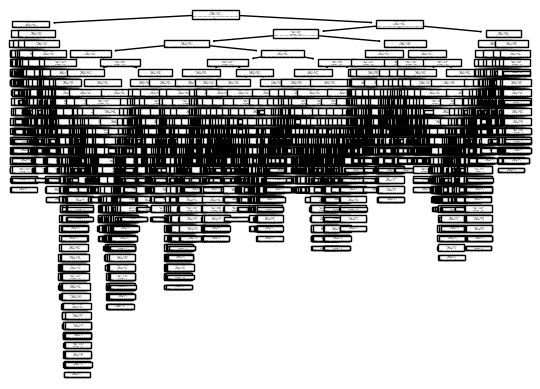

In [ ]:
from sklearn.tree import plot_tree
plot_tree(d_tree)
plt.show()

MLP Models

In [ ]:
df_all["genre"] = df_all["genre"].apply(lambda x: genres[x])


data_shuffled = df_all.sample(frac=1, random_state=17).reset_index(drop=True)


X = data_shuffled.iloc[:,:-1].to_numpy()
y = data_shuffled.iloc[:,-1].to_numpy()

one_hot = OneHotEncoder(sparse=False)
y = one_hot.fit_transform(y.reshape(-1, 1))

# 70 15 15 split
x_train, tempx, y_train, tempy = train_test_split(X, y, train_size=0.7, random_state=17, stratify=y)
x_val, x_test, y_val, y_test = train_test_split(tempx, tempy, train_size=0.5, random_state=17, stratify=tempy)

scaler = StandardScaler()

x_train = scaler.fit_transform(x_train)
x_val = scaler.fit_transform(x_val)
x_test = scaler.fit_transform(x_test)
data_shuffled.iloc[:, ]

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,centroid_mean,centroid_var,rolloff_mean,rolloff_var,zerocrossing_mean,zerocrossing_var,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,...,tonnetz_mean,tonnetz_var,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,tempo,tempogram_ratio,genre
0,2879.834101,6.818698e+04,5630.283124,2.373472e+05,0.170417,0.000748,0.510370,0.073965,0.208368,0.000660,...,-0.008406,0.003914,0.763242,76.846490,-28.626078,61.677387,-18.192995,117.453835,0.699331,metal
1,1152.934675,2.855490e+05,2094.932204,1.325156e+06,0.051409,0.000347,0.275826,0.085874,0.125338,0.003979,...,0.059134,0.038615,-202.871140,171.683290,-23.995638,19.903200,-6.568759,143.554688,0.569532,country
2,3097.712450,2.044815e+06,6115.429688,3.507754e+06,0.157982,0.022361,0.468299,0.094833,0.215661,0.019100,...,0.012957,0.002626,-91.511810,50.110630,11.824114,30.203276,7.383225,92.285156,0.461317,hiphop
3,2271.468930,1.442324e+05,4656.720816,4.685193e+05,0.107095,0.001217,0.401241,0.084652,0.199001,0.000734,...,0.009042,0.004654,-37.770930,97.021996,-33.804688,56.341200,-13.381386,117.453835,0.669699,metal
4,3732.496201,6.061822e+05,7794.594863,7.750468e+05,0.173836,0.005948,0.479153,0.075117,0.076922,0.000447,...,0.016074,0.008793,-118.339640,48.237274,36.940254,23.505460,-3.132460,107.666016,0.468781,jazz
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,3415.907348,5.714782e+05,8023.411051,9.851083e+05,0.119939,0.001861,0.440710,0.079784,0.114894,0.002157,...,0.048673,0.006858,-120.410630,66.145770,48.539112,16.246773,16.107738,107.666016,0.374062,disco
19996,1638.967412,4.094150e+05,3575.111715,2.709055e+06,0.063961,0.001357,0.349011,0.088236,0.082028,0.001614,...,-0.028200,0.017490,-190.917650,127.409760,-3.763439,26.714160,-12.804948,151.999081,0.352136,reggae
19997,2159.221909,1.440351e+06,4381.758376,3.274783e+06,0.109890,0.010740,0.401752,0.092450,0.129317,0.001664,...,-0.007333,0.014679,-127.069320,109.288025,-4.525980,47.663400,-8.420688,95.703125,0.444583,rock
19998,1850.480099,2.464827e+05,3772.157546,8.651561e+05,0.094739,0.001485,0.390285,0.082828,0.072570,0.000263,...,0.005334,0.013218,-156.233250,123.502980,-38.977608,54.690170,-10.579122,129.199219,0.594934,rock


21 -> 128 -> 64 -> 32 -> 10 Adam, lr=.1

In [ ]:
model_v1 = models.Sequential()
model_v1.add(layers.Dense(21))
model_v1.add(layers.BatchNormalization())
model_v1.add(layers.Activation('sigmoid'))
model_v1.add(layers.Dense(128))
model_v1.add(layers.BatchNormalization())
model_v1.add(layers.Activation('sigmoid'))
model_v1.add(layers.Dense(64))
model_v1.add(layers.BatchNormalization())
model_v1.add(layers.Activation('sigmoid'))
model_v1.add(layers.Dense(32))
model_v1.add(layers.BatchNormalization())
model_v1.add(layers.Activation('sigmoid'))
model_v1.add(layers.Dense(10, 'softmax'))

v1_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath='/content/drive/MyDrive/Colab Notebooks/data/v1_checkpoints',
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)


lr = 0.1
epochs = 500
batch_size = 400

opt = tf.keras.optimizers.Adam(learning_rate=lr)


ValueError: ignored

In [ ]:
model_v1.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])


v1_history = model_v1.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(x_val, y_val), verbose=1, callbacks=[v1_callback])

ValueError: ignored

In [ ]:
model_v1.load_weights('/content/drive/MyDrive/Colab Notebooks/data/v1_checkpoints')

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (1, 21)                   462       
                                                                 
 batch_normalization (BatchN  (1, 21)                  84        
 ormalization)                                                   
                                                                 
 activation (Activation)     (1, 21)                   0         
                                                                 
 dense_1 (Dense)             (1, 128)                  2816      
                                                                 
 batch_normalization_1 (Batc  (1, 128)                 512       
 hNormalization)                                                 
                                                                 
 activation_1 (Activation)   (1, 128)                  0

94/94 [==============================] - 0s 1ms/step - loss: 0.5850 - accuracy: 0.9137
Max. Validation Accuracy 0.9076666831970215


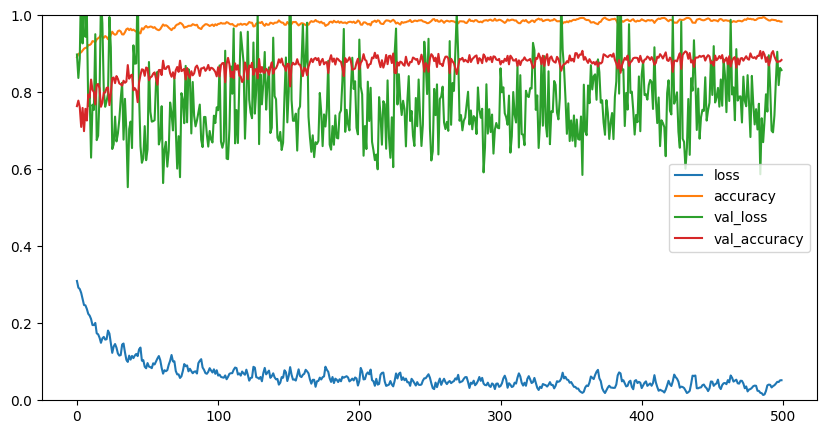

In [ ]:
model_v1.evaluate(x_test, y_test)
print("Max. Validation Accuracy",max(v1_history.history["val_accuracy"]))
pd.DataFrame(v1_history.history).plot(figsize=(10,5))
plt.ylim([0, 1])
plt.show()

In [ ]:
model_v1.save('/content/drive/MyDrive/Colab Notebooks/data/model_v1')

In [ ]:
model_v2 = models.Sequential()
model_v2.add(layers.Dense(21))
model_v2.add(layers.BatchNormalization())
model_v2.add(layers.Activation('relu'))
model_v2.add(layers.Dense(256))
model_v2.add(layers.BatchNormalization())
model_v2.add(layers.Activation('relu'))
model_v2.add(layers.Dense(128))
model_v2.add(layers.BatchNormalization())
model_v2.add(layers.Activation('relu'))
model_v2.add(layers.Dense(64))
model_v2.add(layers.BatchNormalization())
model_v2.add(layers.Activation('relu'))
model_v2.add(layers.Dense(32))
model_v2.add(layers.BatchNormalization())
model_v2.add(layers.Activation('relu'))
model_v2.add(layers.Dense(10, 'softmax'))

v2_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath='/content/drive/MyDrive/Colab Notebooks/data/v2_checkpoints',
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)


lr = 0.1
epochs = 500
batch_size = 400

opt = tf.keras.optimizers.Adam(learning_rate=lr)

In [ ]:
model_v2.build(input_shape=(1, 21))
model_v2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (1, 21)                   462       
                                                                 
 batch_normalization_4 (Batc  (1, 21)                  84        
 hNormalization)                                                 
                                                                 
 activation_4 (Activation)   (1, 21)                   0         
                                                                 
 dense_6 (Dense)             (1, 256)                  5632      
                                                                 
 batch_normalization_5 (Batc  (1, 256)                 1024      
 hNormalization)                                                 
                                                                 
 activation_5 (Activation)   (1, 256)                 

In [ ]:
model_v2.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

v2_history = model_v2.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(x_val, y_val), verbose=1, callbacks=[v2_callback])

Epoch 1/500
35/35 [==============================] - 3s 19ms/step - loss: 1.4662 - accuracy: 0.4722 - val_loss: 103.7461 - val_accuracy: 0.2953
Epoch 2/500
35/35 [==============================] - 0s 11ms/step - loss: 1.0637 - accuracy: 0.6244 - val_loss: 22.2444 - val_accuracy: 0.3313
Epoch 3/500
35/35 [==============================] - 0s 9ms/step - loss: 0.9781 - accuracy: 0.6520 - val_loss: 17.0361 - val_accuracy: 0.2393
Epoch 4/500
35/35 [==============================] - 0s 11ms/step - loss: 0.8891 - accuracy: 0.6835 - val_loss: 10.0168 - val_accuracy: 0.3333
Epoch 5/500
35/35 [==============================] - 0s 10ms/step - loss: 0.7990 - accuracy: 0.7131 - val_loss: 8.7090 - val_accuracy: 0.3687
Epoch 6/500
35/35 [==============================] - 0s 7ms/step - loss: 0.7521 - accuracy: 0.7337 - val_loss: 10.1064 - val_accuracy: 0.3473
Epoch 7/500
35/35 [==============================] - 0s 10ms/step - loss: 0.6801 - accuracy: 0.7569 - val_loss: 8.2894 - val_accuracy: 0.3987
Ep

In [ ]:
model_v2.load_weights('/content/drive/MyDrive/Colab Notebooks/data/v2_checkpoints')

94/94 [==============================] - 0s 1ms/step - loss: 0.5155 - accuracy: 0.9190
Max. Validation Accuracy 0.9366666674613953


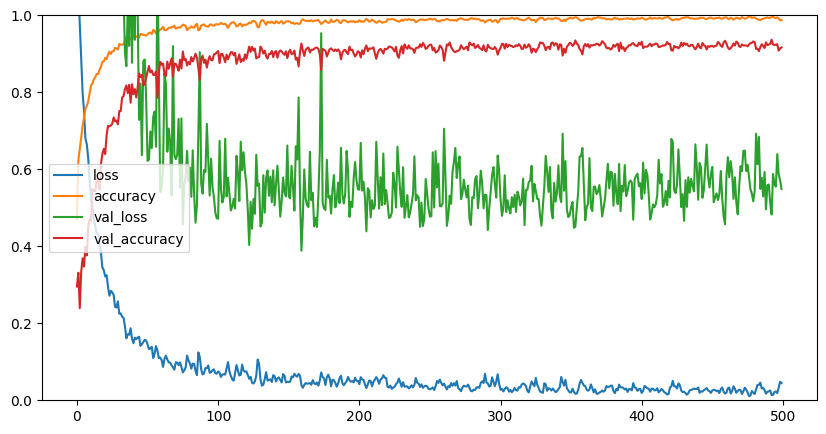

In [ ]:
model_v2.evaluate(x_test, y_test)
print("Max. Validation Accuracy",max(v2_history.history["val_accuracy"]))
pd.DataFrame(v2_history.history).plot(figsize=(10,5))
plt.ylim([0, 1])
plt.show()

In [ ]:
model_v2.save('/content/drive/MyDrive/Colab Notebooks/data/model_v2')

In [ ]:
model_v3 = models.Sequential()
model_v3.add(layers.Dense(21))
model_v3.add(layers.BatchNormalization())
model_v3.add(layers.Activation('relu'))
model_v3.add(layers.Dense(1024))
model_v3.add(layers.BatchNormalization())
model_v3.add(layers.Activation('relu'))
model_v3.add(layers.Dense(512))
model_v3.add(layers.BatchNormalization())
model_v3.add(layers.Activation('relu'))
model_v3.add(layers.Dense(256))
model_v3.add(layers.BatchNormalization())
model_v3.add(layers.Activation('relu'))
model_v3.add(layers.Dense(128))
model_v3.add(layers.BatchNormalization())
model_v3.add(layers.Activation('relu'))
model_v3.add(layers.Dense(64))
model_v3.add(layers.BatchNormalization())
model_v3.add(layers.Activation('relu'))
model_v3.add(layers.Dense(32))
model_v3.add(layers.BatchNormalization())
model_v3.add(layers.Activation('relu'))
model_v3.add(layers.Dense(10, 'softmax'))

v3_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath='/content/drive/MyDrive/Colab Notebooks/data/v3_checkpoints',
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)


lr = 0.1
epochs = 500
batch_size = 400

opt = tf.keras.optimizers.Adam(learning_rate=lr)

In [ ]:
model_v3.build(input_shape=(1, 21))
model_v3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (1, 21)                   462       
                                                                 
 batch_normalization_9 (Batc  (1, 21)                  84        
 hNormalization)                                                 
                                                                 
 activation_9 (Activation)   (1, 21)                   0         
                                                                 
 dense_12 (Dense)            (1, 1024)                 22528     
                                                                 
 batch_normalization_10 (Bat  (1, 1024)                4096      
 chNormalization)                                                
                                                                 
 activation_10 (Activation)  (1, 1024)                

In [ ]:
model_v3.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

v3_history = model_v3.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(x_val, y_val), verbose=1, callbacks=[v3_callback])

Epoch 1/500
35/35 [==============================] - 5s 65ms/step - loss: 1.6145 - accuracy: 0.4114 - val_loss: 543.9805 - val_accuracy: 0.1927
Epoch 2/500
35/35 [==============================] - 1s 40ms/step - loss: 1.1680 - accuracy: 0.5763 - val_loss: 39.2475 - val_accuracy: 0.2643
Epoch 3/500
35/35 [==============================] - 1s 43ms/step - loss: 1.0084 - accuracy: 0.6411 - val_loss: 12.8364 - val_accuracy: 0.3550
Epoch 4/500
35/35 [==============================] - 1s 38ms/step - loss: 0.9204 - accuracy: 0.6681 - val_loss: 10.6378 - val_accuracy: 0.3170
Epoch 5/500
35/35 [==============================] - 2s 44ms/step - loss: 0.8605 - accuracy: 0.6909 - val_loss: 6.9801 - val_accuracy: 0.3620
Epoch 6/500
35/35 [==============================] - 1s 42ms/step - loss: 0.7887 - accuracy: 0.7216 - val_loss: 7.4449 - val_accuracy: 0.3943
Epoch 7/500
35/35 [==============================] - 1s 42ms/step - loss: 0.6999 - accuracy: 0.7584 - val_loss: 5.6335 - val_accuracy: 0.4443
E

In [ ]:
model_v3.load_weights('/content/drive/MyDrive/Colab Notebooks/data/v3_checkpoints')

94/94 [==============================] - 0s 2ms/step - loss: 0.2969 - accuracy: 0.9513
Max. Validation Accuracy 0.9506666660308838


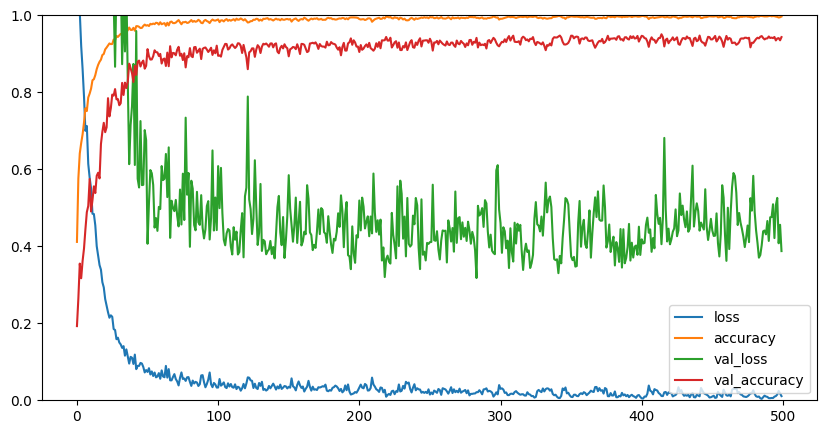

In [ ]:
model_v3.evaluate(x_test, y_test)
print("Max. Validation Accuracy",max(v3_history.history["val_accuracy"]))
pd.DataFrame(v3_history.history).plot(figsize=(10,5))
plt.ylim([0, 1])
plt.show()

In [ ]:
model_v3.save('/content/drive/MyDrive/Colab Notebooks/data/model_v3')

In [ ]:
model_v4 = models.Sequential()
model_v4.add(layers.Dense(21))
model_v4.add(layers.BatchNormalization())
model_v4.add(layers.Activation('relu'))
model_v4.add(layers.Dense(1024))
model_v4.add(layers.Dropout(0.1))
model_v4.add(layers.BatchNormalization())
model_v4.add(layers.Activation('relu'))
model_v4.add(layers.Dense(512))
model_v4.add(layers.Dropout(0.1))
model_v4.add(layers.BatchNormalization())
model_v4.add(layers.Activation('relu'))
model_v4.add(layers.Dense(256))
model_v4.add(layers.Dropout(0.1))
model_v4.add(layers.BatchNormalization())
model_v4.add(layers.Activation('relu'))
model_v4.add(layers.Dense(128))
model_v4.add(layers.Dropout(0.1))
model_v4.add(layers.BatchNormalization())
model_v4.add(layers.Activation('relu'))
model_v4.add(layers.Dense(64))
model_v4.add(layers.Dropout(0.1))
model_v4.add(layers.BatchNormalization())
model_v4.add(layers.Activation('relu'))
model_v4.add(layers.Dense(32))
model_v4.add(layers.Dropout(0.1))
model_v4.add(layers.BatchNormalization())
model_v4.add(layers.Activation('relu'))
model_v4.add(layers.Dense(10, 'softmax'))

v4_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath='/content/drive/MyDrive/Colab Notebooks/data/v4_checkpoints',
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)


lr = 0.1
epochs = 500
batch_size = 400

opt = tf.keras.optimizers.Adam(learning_rate=lr)

In [ ]:
model_v4.build(input_shape=(1, 21))
model_v4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_19 (Dense)            (1, 21)                   462       
                                                                 
 batch_normalization_16 (Bat  (1, 21)                  84        
 chNormalization)                                                
                                                                 
 activation_16 (Activation)  (1, 21)                   0         
                                                                 
 dense_20 (Dense)            (1, 1024)                 22528     
                                                                 
 dropout (Dropout)           (1, 1024)                 0         
                                                                 
 batch_normalization_17 (Bat  (1, 1024)                4096      
 chNormalization)                                     

In [ ]:
model_v4.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

v4_history = model_v4.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(x_val, y_val), verbose=1, callbacks=[v4_callback])

Epoch 1/500
35/35 [==============================] - 5s 58ms/step - loss: 1.6751 - accuracy: 0.3824 - val_loss: 723.6451 - val_accuracy: 0.2023
Epoch 2/500
35/35 [==============================] - 2s 52ms/step - loss: 1.3452 - accuracy: 0.5005 - val_loss: 73.7044 - val_accuracy: 0.3007
Epoch 3/500
35/35 [==============================] - 2s 48ms/step - loss: 1.2032 - accuracy: 0.5715 - val_loss: 22.7056 - val_accuracy: 0.3347
Epoch 4/500
35/35 [==============================] - 2s 55ms/step - loss: 1.1021 - accuracy: 0.6243 - val_loss: 12.5003 - val_accuracy: 0.3687
Epoch 5/500
35/35 [==============================] - 3s 73ms/step - loss: 1.0213 - accuracy: 0.6506 - val_loss: 7.2823 - val_accuracy: 0.4407
Epoch 6/500
35/35 [==============================] - 2s 48ms/step - loss: 0.9926 - accuracy: 0.6647 - val_loss: 5.5787 - val_accuracy: 0.4840
Epoch 7/500
35/35 [==============================] - 2s 50ms/step - loss: 0.9656 - accuracy: 0.6718 - val_loss: 3.3699 - val_accuracy: 0.5530
E

In [ ]:
model_v4.load_weights('/content/drive/MyDrive/Colab Notebooks/data/v4_checkpoints')

94/94 [==============================] - 0s 3ms/step - loss: 0.3143 - accuracy: 0.9377
Max. Validation Accuracy 0.9433333277702332


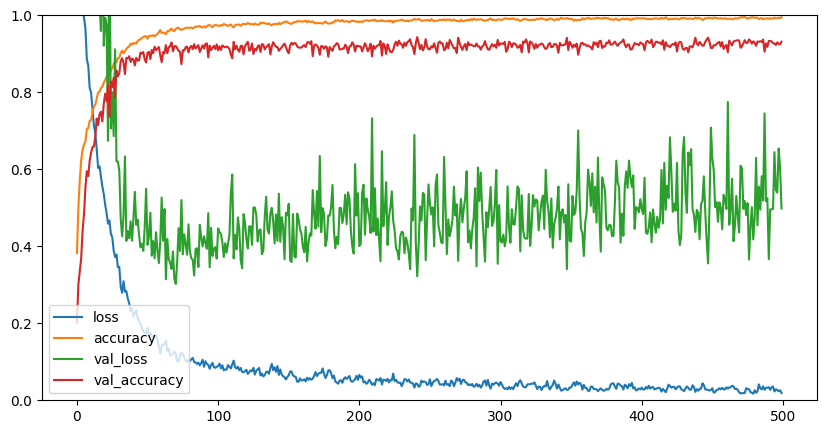

In [ ]:
model_v4.evaluate(x_test, y_test)
print("Max. Validation Accuracy",max(v4_history.history["val_accuracy"]))
pd.DataFrame(v4_history.history).plot(figsize=(10,5))
plt.ylim([0, 1])
plt.show()

In [ ]:
model_v4.save('/content/drive/MyDrive/Colab Notebooks/data/model_v4')

In [ ]:
y_hat = model_v3.predict(x_test)

y_hat = np.apply_along_axis(lambda x: one_hot.categories_[0][x], 0, y_hat.argmax(axis=1))

y_test_decoded = np.apply_along_axis(lambda x: one_hot.categories_[0][x], 0, y_test.argmax(axis=1))
y_test_decoded

94/94 [==============================] - 1s 7ms/step


array(['disco', 'rock', 'reggae', ..., 'blues', 'blues', 'pop'],
      dtype=object)

In [ ]:
y_hat

array(['disco', 'disco', 'reggae', ..., 'blues', 'blues', 'pop'],
      dtype=object)

In [ ]:
Cmat = confusion_matrix(y_test_decoded, y_hat)
acc = model_v4.evaluate(x_test,y_test)

print("Model v3 Confusion Matrix: ")
print(Cmat)
print("Accuracy: " + str(format(acc[1]*100,'.2f')) + '%')

94/94 [==============================] - 1s 6ms/step - loss: 0.3143 - accuracy: 0.9377
Model v3 Confusion Matrix: 
[[281   1   2   1   3   3   0   0   4   5]
 [  1 292   1   0   0   3   0   1   0   2]
 [  7   0 272   1   1   3   0   1   4  11]
 [  0   0   0 289   2   1   0   1   3   4]
 [  0   1   0   2 290   0   3   2   1   1]
 [  1   2   0   0   0 293   0   0   2   2]
 [  1   0   1   0   2   0 294   0   0   2]
 [  0   0   1   2   0   1   0 289   2   5]
 [  2   1   0   2   3   1   2   4 283   2]
 [  6   0   1   7   1   2   7   1   4 271]]
Accuracy: 93.77%


In [ ]:
models = [model_v1, model_v2, model_v3, model_v4]
y_test_decoded = np.apply_along_axis(lambda x: one_hot.categories_[0][x], 0, y_test.argmax(axis=1))
for i in range(len(models)):
  y_hat = models[i].predict(x_test)
  y_hat = np.apply_along_axis(lambda x: one_hot.categories_[0][x], 0, y_hat.argmax(axis=1))
  Cmat = confusion_matrix(y_test_decoded, y_hat)
  acc = models[i].evaluate(x_test,y_test)[1]

  print(f"Model v{i + 1} Confusion Matrix: ")
  print(Cmat)
  print("Accuracy: " + str(format(acc*100,'.2f')) + '%\n\n')

94/94 [==============================] - 0s 2ms/step - loss: 0.5850 - accuracy: 0.9137
Model v1 Confusion Matrix: 
[[284   0   3   3   2   4   0   0   2   2]
 [  0 286   0   1   0   9   0   2   0   2]
 [  5   0 261   1   2  10   1   3   3  14]
 [  3   1   0 281   4   1   0   2   2   6]
 [  0   1   0   6 282   0   3   1   7   0]
 [  6   4   5   6   0 276   0   1   0   2]
 [  5   0   0   1   2   0 281   0   0  11]
 [  0   0   2   2  11   2   0 277   2   4]
 [  3   2   5  10   7   4   0   3 262   4]
 [  7   1   7  14   0   6   8   2   4 251]]
Accuracy: 91.37%


94/94 [==============================] - 0s 2ms/step - loss: 17.1881 - accuracy: 0.1297
Model v2 Confusion Matrix: 
[[ 35   3   0   0  91  12 121   4  13  21]
 [158  14   0   0   1  77  34   0   5  11]
 [ 67  23   2  19  68   4  27   0  11  79]
 [ 81  18   0  11  68  14  13   0  58  37]
 [ 27   9   0  11 193   6   9   2  39   4]
 [ 77  37   1  10  21  27  79   0   2  46]
 [ 21  26   0   3  69  16   4   3 154   4]
 [ 38   7   1  29 